In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv(r"/content/datos_tm.csv")

df.info

<bound method DataFrame.info of      id_ruta              nombre_ruta id_estacion  nombre_estacion troncal  \
0        B12     B12 Portal Norte-Sur     TMB1201     Portal Norte      AN   
1        B12     B12 Portal Norte-Sur     TMB1202          Toberín      AN   
2        B12     B12 Portal Norte-Sur     TMB1203        Calle 100      AN   
3        B12     B12 Portal Norte-Sur     TMB1204        Calle 127      AN   
4        B12     B12 Portal Norte-Sur     TMB1205        Calle 142      AN   
...      ...                      ...         ...              ...     ...   
1084     M86  M86 Portal Sur-Eldorado     TMM8609       Madelena 2    NQSS   
1085     M86  M86 Portal Sur-Eldorado     TMM8610      San Mateo 2    NQSS   
1086     M86  M86 Portal Sur-Eldorado     TMM8611       Banderas 2    NQSS   
1087     M86  M86 Portal Sur-Eldorado     TMM8612         Alamos 2    NQSS   
1088     M86  M86 Portal Sur-Eldorado     TMM8613  Portal Eldorado    NQSS   

      orden_parada  distancia_anterior_m  tiempo_recorrido_prom_s  \
0                1                   0.0                      0.0   
1                2                1104.6                    366.0   
2                3                1002.1                    317.8   
3                4                 908.5                    303.7   
4                5                 990.1                    353.4   
...            ...                   ...                      ...   
1084             9                 468.6                    199.6   
1085            10                1222.6                    438.3   
1086            11                 740.4                    300.0   
1087            12                 692.3                    277.2   
1088            13                1000.0                    414.2   

      tiempo_recorrido_desv_s  tiempo_espera_prom_s  tiempo_espera_desv_s  \
0                         0.0                  48.2                   4.8   
1                        30.1                  19.8                   3.0   
2                        37.8                  17.6                   2.6   
3                        28.0                  11.2                   1.7   
4                        28.9                  19.7                   2.9   
...                       ...                   ...                   ...   
1084                     16.4                  21.1                   3.2   
1085                     48.4                  19.9                   3.0   
1086                     31.6                  20.5                   3.1   
1087                     29.9                  20.2                   3.0   
1088                     44.3                  55.2                   5.5   

      semaforos  paradas_intermedias  capacidad_pasajeros  demanda_promedio  
0             0                    0                  602               521  
1             0                    0                  301               230  
2             0                    0                  341               287  
3             0                    0                  198               158  
4             0                    0                  257               154  
...         ...                  ...                  ...               ...  
1084          2                    0                  205               203  
1085          0                    1                  184               176  
1086          1                    1                  284               121  
1087          2                    1                  211               189  
1088          0                    1                  791               551  

[1089 rows x 15 columns]>

In [ ]:
df

,id_ruta,nombre_ruta,id_estacion,nombre_estacion,troncal,orden_parada,distancia_anterior_m,tiempo_recorrido_prom_s,tiempo_recorrido_desv_s,tiempo_espera_prom_s,tiempo_espera_desv_s,semaforos,paradas_intermedias,capacidad_pasajeros,demanda_promedio
0,B12,B12 Portal Norte-Sur,TMB1201,Portal Norte,AN,1,0.0,0.0,0.0,48.2,4.8,0,0,602,521
1,B12,B12 Portal Norte-Sur,TMB1202,Toberín,AN,2,1104.6,366.0,30.1,19.8,3.0,0,0,301,230
2,B12,B12 Portal Norte-Sur,TMB1203,Calle 100,AN,3,1002.1,317.8,37.8,17.6,2.6,0,0,341,287
3,B12,B12 Portal Norte-Sur,TMB1204,Calle 127,AN,4,908.5,303.7,28.0,11.2,1.7,0,0,198,158
4,B12,B12 Portal Norte-Sur,TMB1205,Calle 142,AN,5,990.1,353.4,28.9,19.7,2.9,0,0,257,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,M86,M86 Portal Sur-Eldorado,TMM8609,Madelena 2,NQSS,9,468.6,199.6,16.4,21.1,3.2,2,0,205,203
1085,M86,M86 Portal Sur-Eldorado,TMM8610,San Mateo 2,NQSS,10,1222.6,438.3,48.4,19.9,3.0,0,1,184,176
1086,M86,M86 Portal Sur-Eldorado,TMM8611,Banderas 2,NQSS,11,740.4,300.0,31.6,20.5,3.1,1,1,284,121
1087,M86,M86 Portal Sur-Eldorado,TMM8612,Alamos 2,NQSS,12,692.3,277.2,29.9,20.2,3.0,2,1,211,189


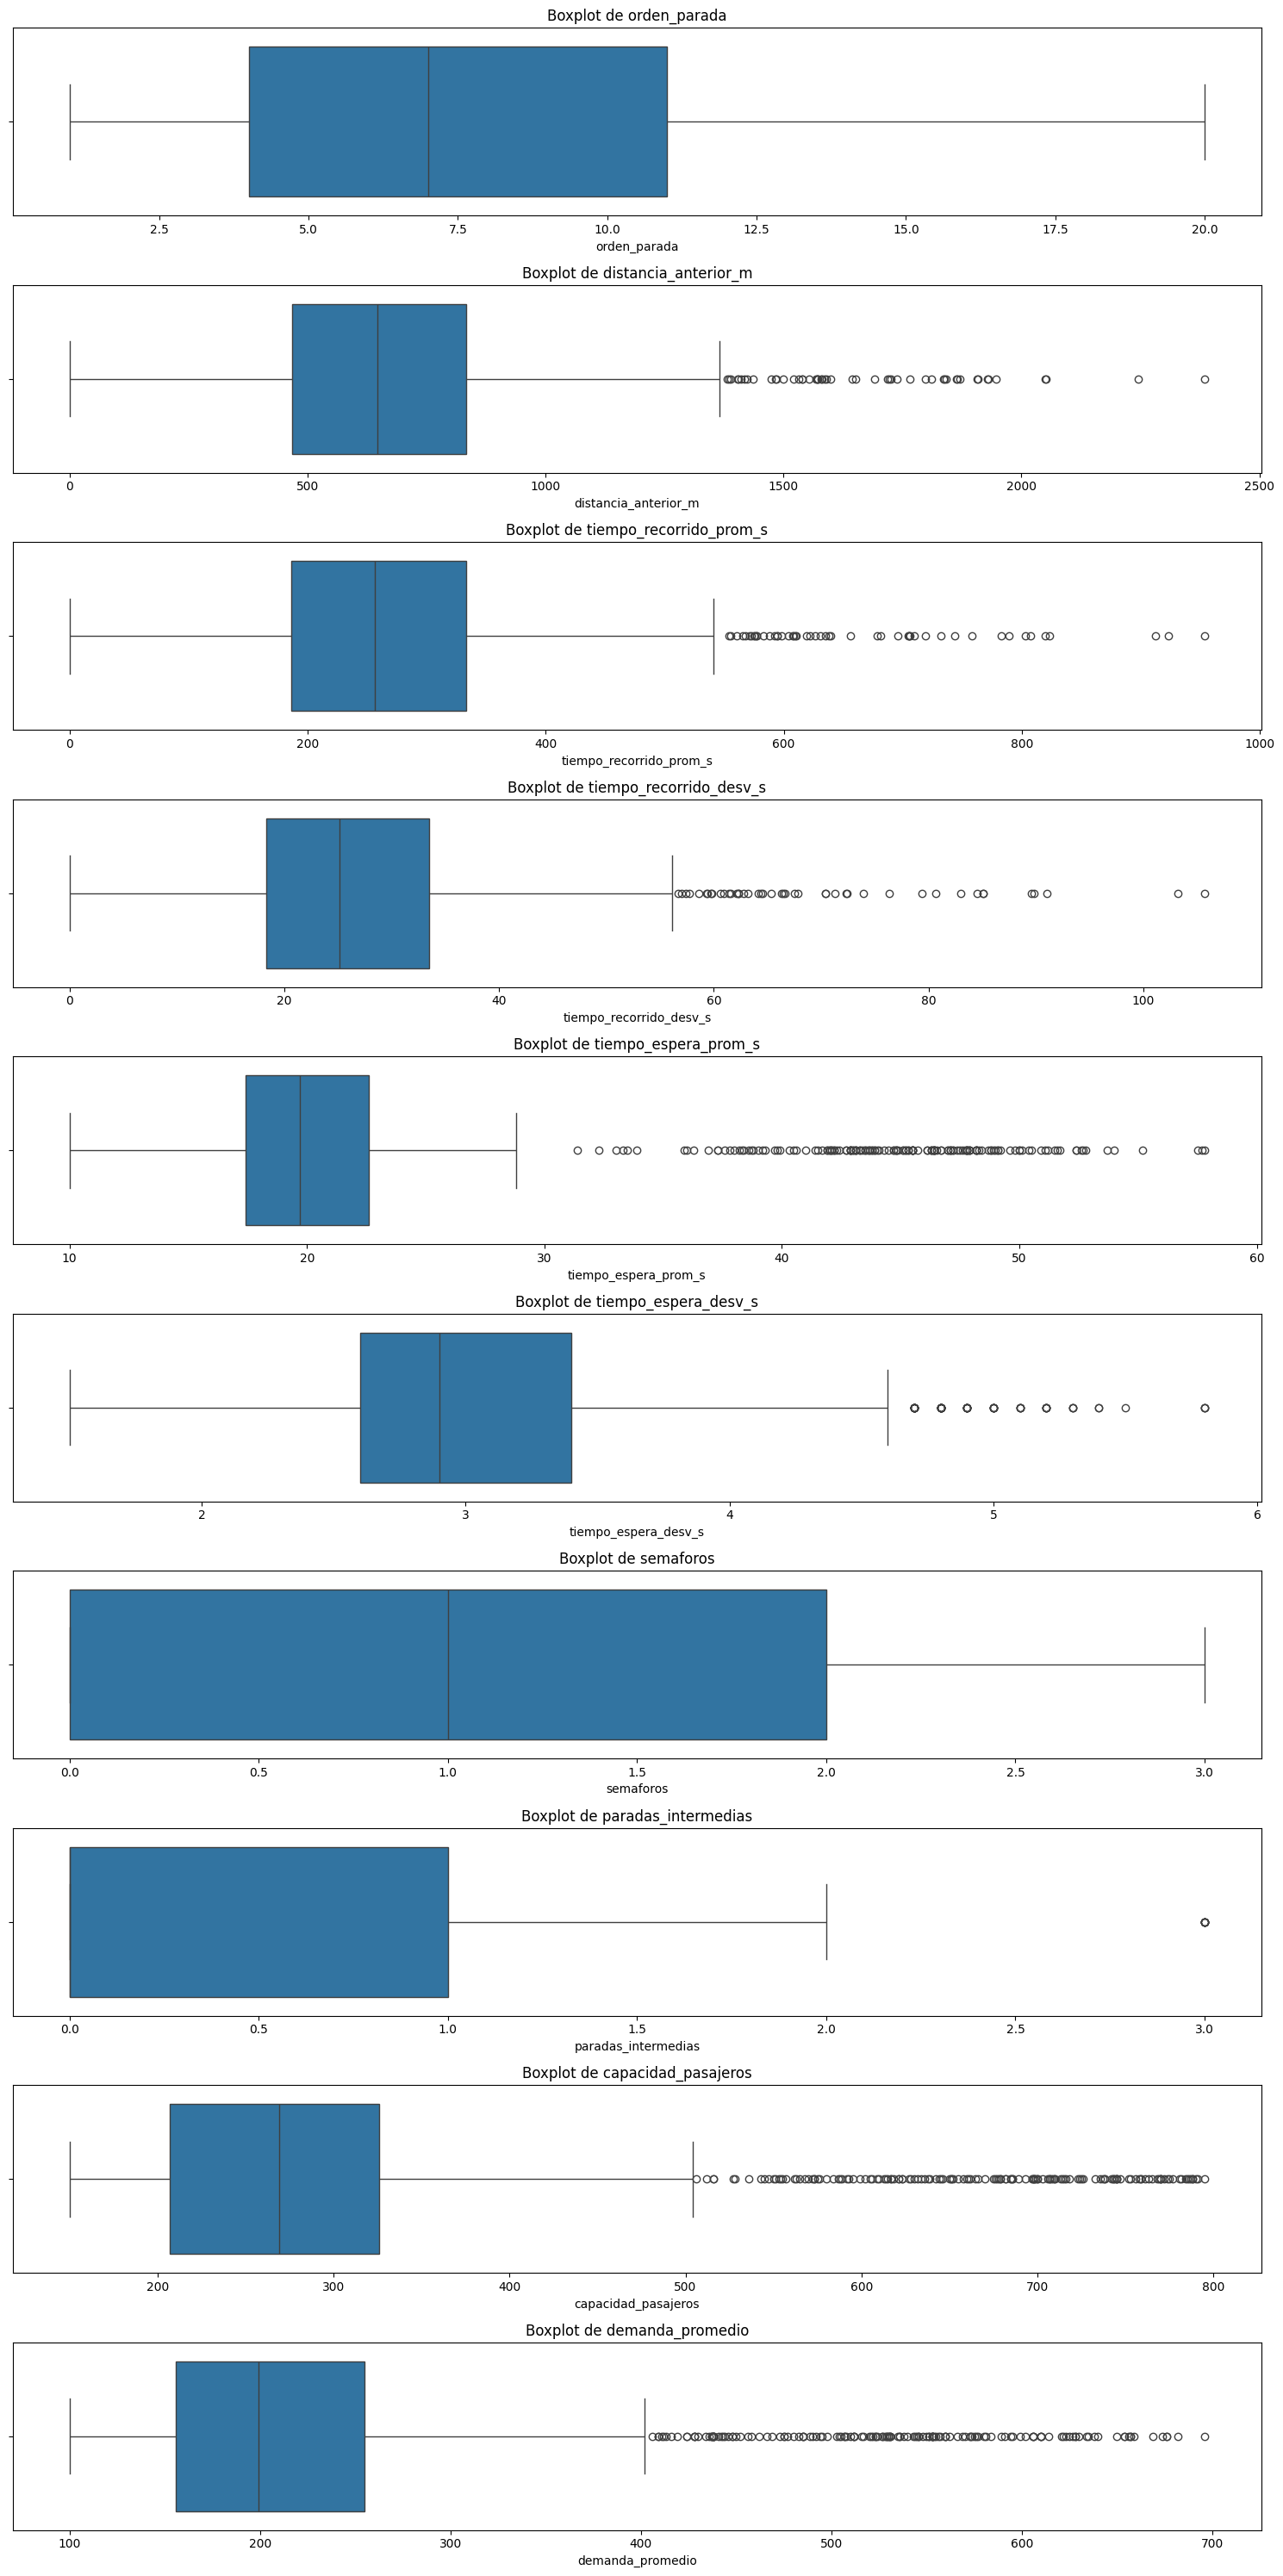


Tamaño original del dataset: (1089, 15)
Tamaño después de eliminar outliers: (909, 15)


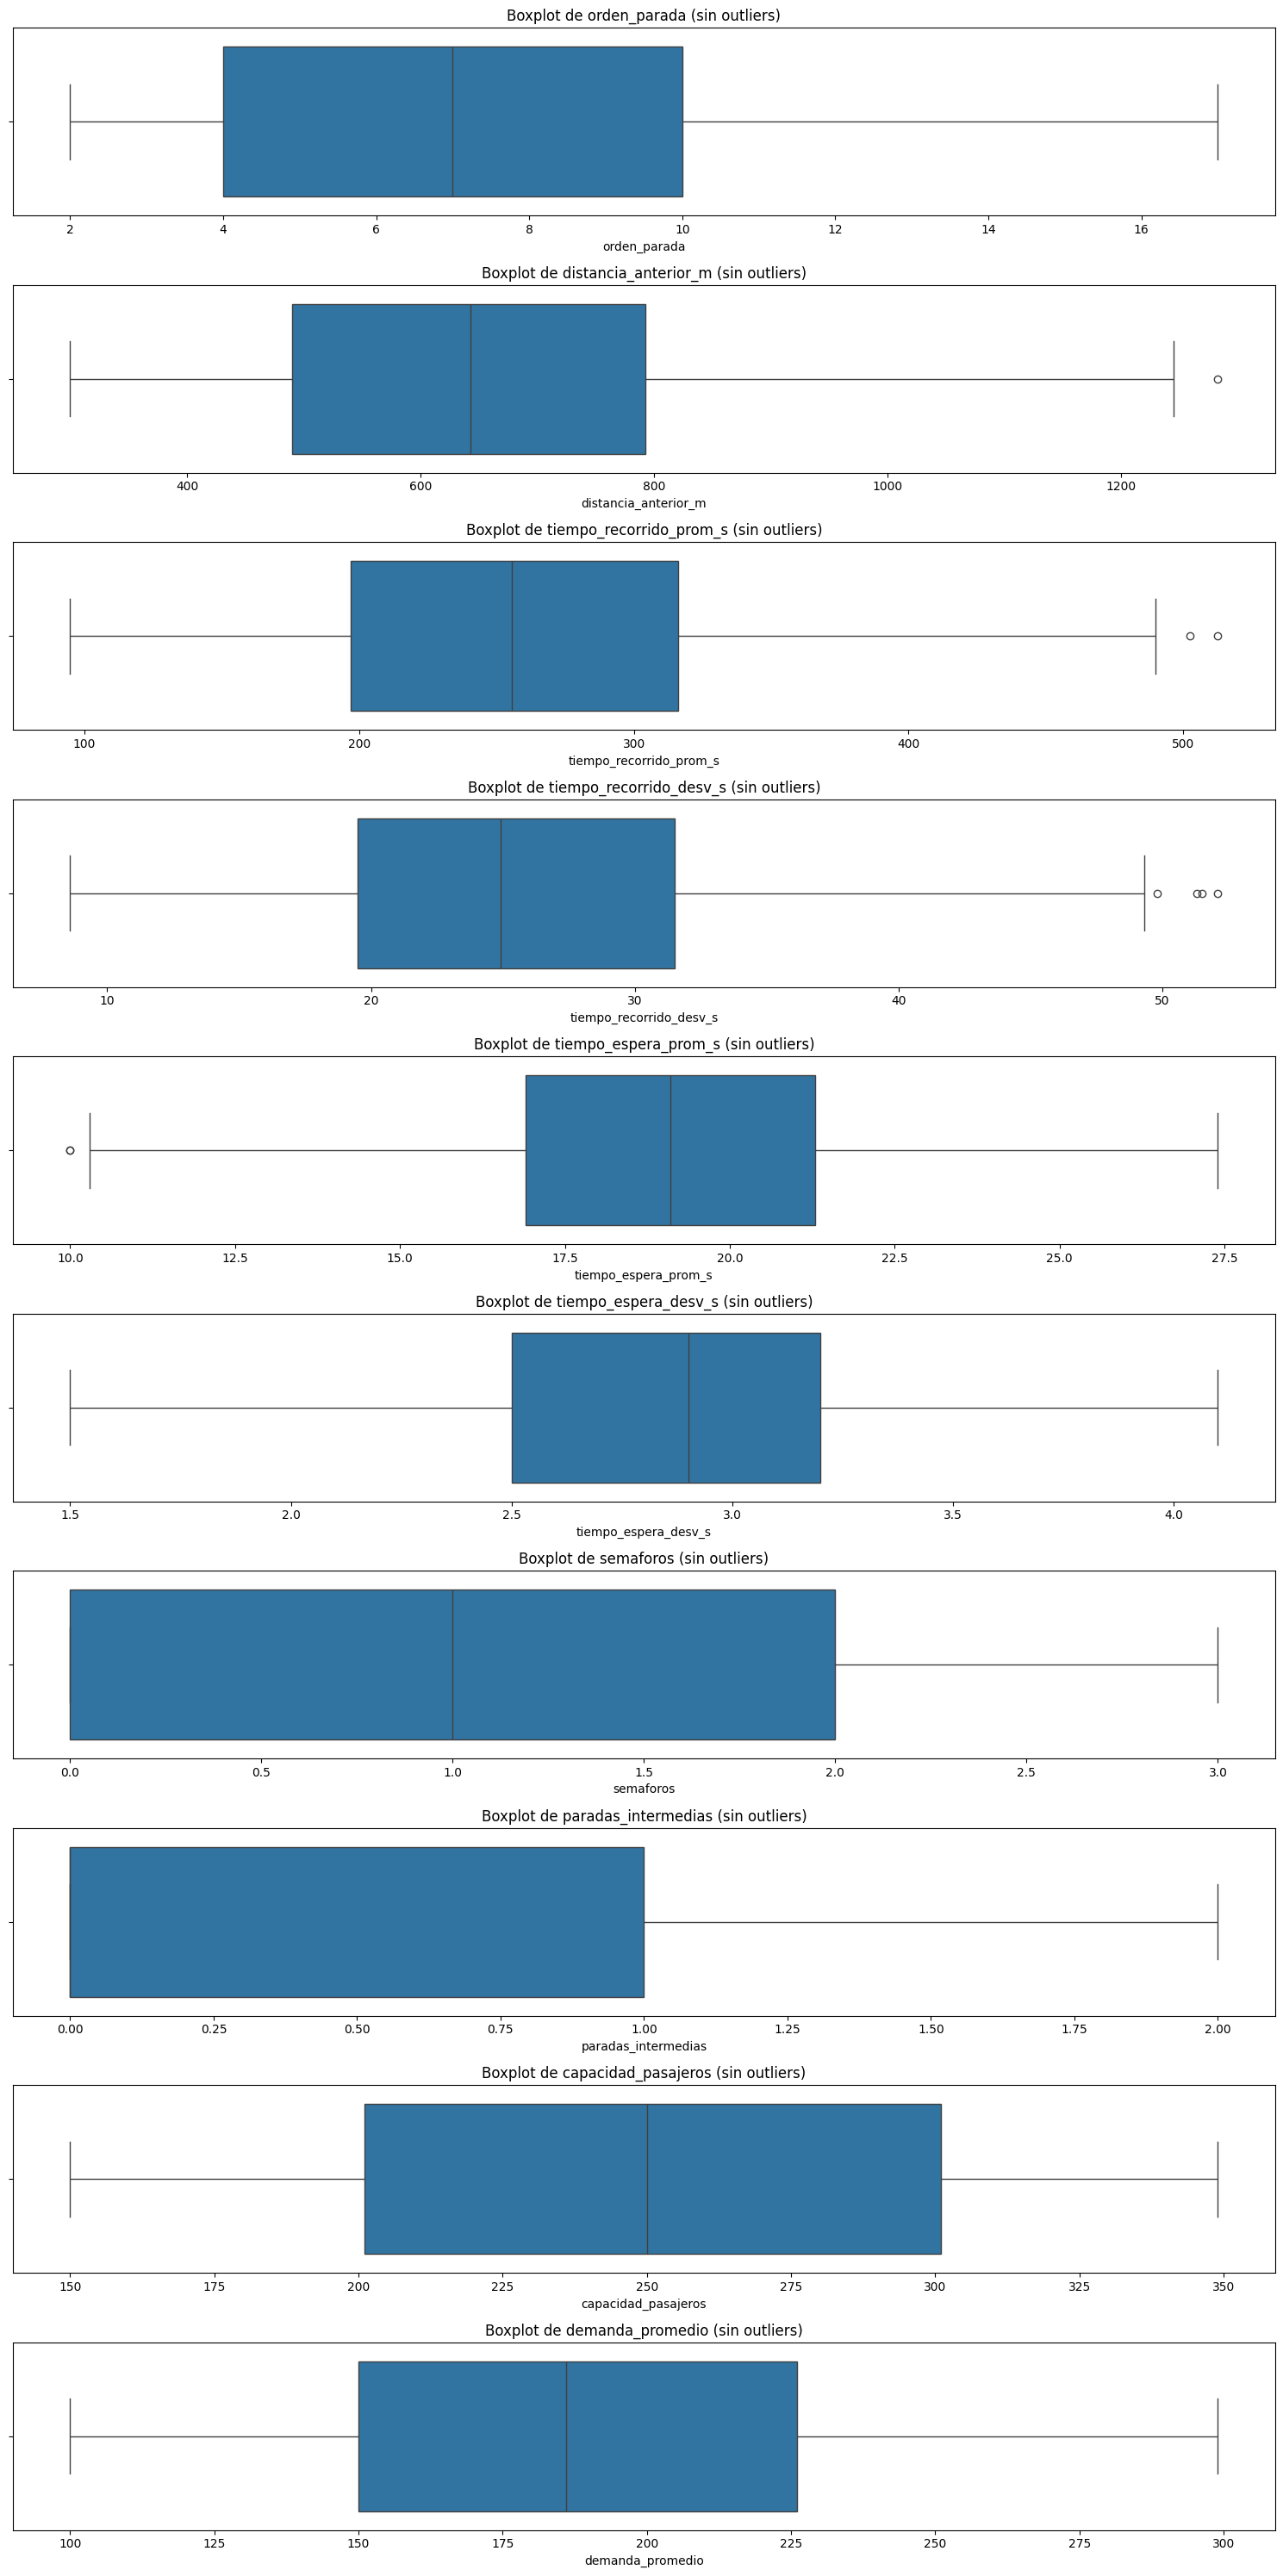

In [ ]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, len(numeric_cols) * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

def remove_outliers_iqr(dataframe, cols):
  #creamos una copia de la base de datos original
    df_clean = dataframe.copy()
    for col in cols:
      #Calculamos los quartiles
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_clean = remove_outliers_iqr(df, numeric_cols)

print(f"\nTamaño original del dataset: {df.shape}")
print(f"Tamaño después de eliminar outliers: {df_clean.shape}")

plt.figure(figsize=(15, len(numeric_cols) * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot de {col} (sin outliers)')
plt.tight_layout()
plt.show()

In [ ]:
df_clean

,id_ruta,nombre_ruta,id_estacion,nombre_estacion,troncal,orden_parada,distancia_anterior_m,tiempo_recorrido_prom_s,tiempo_recorrido_desv_s,tiempo_espera_prom_s,tiempo_espera_desv_s,semaforos,paradas_intermedias,capacidad_pasajeros,demanda_promedio
1,B12,B12 Portal Norte-Sur,TMB1202,Toberín,AN,2,1104.6,366.0,30.1,19.8,3.0,0,0,301,230
2,B12,B12 Portal Norte-Sur,TMB1203,Calle 100,AN,3,1002.1,317.8,37.8,17.6,2.6,0,0,341,287
3,B12,B12 Portal Norte-Sur,TMB1204,Calle 127,AN,4,908.5,303.7,28.0,11.2,1.7,0,0,198,158
4,B12,B12 Portal Norte-Sur,TMB1205,Calle 142,AN,5,990.1,353.4,28.9,19.7,2.9,0,0,257,154
5,B12,B12 Portal Norte-Sur,TMB1206,Calle 146,AN,6,646.4,270.4,26.7,20.3,3.0,0,0,222,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,M86,M86 Portal Sur-Eldorado,TMM8608,Sevillana 2,NQSS,8,803.7,274.1,26.6,24.8,3.7,1,0,344,238
1084,M86,M86 Portal Sur-Eldorado,TMM8609,Madelena 2,NQSS,9,468.6,199.6,16.4,21.1,3.2,2,0,205,203
1085,M86,M86 Portal Sur-Eldorado,TMM8610,San Mateo 2,NQSS,10,1222.6,438.3,48.4,19.9,3.0,0,1,184,176
1086,M86,M86 Portal Sur-Eldorado,TMM8611,Banderas 2,NQSS,11,740.4,300.0,31.6,20.5,3.1,1,1,284,121


In [ ]:
df_b12 = df_clean[df_clean['id_ruta'] == 'B12']
df_b12

,id_ruta,nombre_ruta,id_estacion,nombre_estacion,troncal,orden_parada,distancia_anterior_m,tiempo_recorrido_prom_s,tiempo_recorrido_desv_s,tiempo_espera_prom_s,tiempo_espera_desv_s,semaforos,paradas_intermedias,capacidad_pasajeros,demanda_promedio
1,B12,B12 Portal Norte-Sur,TMB1202,Toberín,AN,2,1104.6,366.0,30.1,19.8,3.0,0,0,301,230
2,B12,B12 Portal Norte-Sur,TMB1203,Calle 100,AN,3,1002.1,317.8,37.8,17.6,2.6,0,0,341,287
3,B12,B12 Portal Norte-Sur,TMB1204,Calle 127,AN,4,908.5,303.7,28.0,11.2,1.7,0,0,198,158
4,B12,B12 Portal Norte-Sur,TMB1205,Calle 142,AN,5,990.1,353.4,28.9,19.7,2.9,0,0,257,154
5,B12,B12 Portal Norte-Sur,TMB1206,Calle 146,AN,6,646.4,270.4,26.7,20.3,3.0,0,0,222,222
6,B12,B12 Portal Norte-Sur,TMB1207,Prado,AN,7,966.5,305.8,36.0,12.9,1.9,0,0,239,152
7,B12,B12 Portal Norte-Sur,TMB1208,Alcalá,AN,8,1023.9,347.3,31.1,21.8,3.3,0,0,157,157
8,B12,B12 Portal Norte-Sur,TMB1209,Toberín 2,AN,9,1116.2,371.9,35.6,20.7,3.1,0,0,283,153
9,B12,B12 Portal Norte-Sur,TMB1210,Calle 100 2,AN,10,659.1,245.5,21.5,21.2,3.2,0,1,349,289
10,B12,B12 Portal Norte-Sur,TMB1211,Calle 127 2,AN,11,834.3,291.3,27.8,21.3,3.2,0,1,303,287


In [ ]:
print("Datos de la ruta B12:")
print(df_b12)
print("\n")

Datos de la ruta B12:
   id_ruta           nombre_ruta id_estacion nombre_estacion troncal  \
1      B12  B12 Portal Norte-Sur     TMB1202         Toberín      AN   
2      B12  B12 Portal Norte-Sur     TMB1203       Calle 100      AN   
3      B12  B12 Portal Norte-Sur     TMB1204       Calle 127      AN   
4      B12  B12 Portal Norte-Sur     TMB1205       Calle 142      AN   
5      B12  B12 Portal Norte-Sur     TMB1206       Calle 146      AN   
6      B12  B12 Portal Norte-Sur     TMB1207           Prado      AN   
7      B12  B12 Portal Norte-Sur     TMB1208          Alcalá      AN   
8      B12  B12 Portal Norte-Sur     TMB1209       Toberín 2      AN   
9      B12  B12 Portal Norte-Sur     TMB1210     Calle 100 2      AN   
10     B12  B12 Portal Norte-Sur     TMB1211     Calle 127 2      AN   
11     B12  B12 Portal Norte-Sur     TMB1212     Calle 142 2      AN   
12     B12  B12 Portal Norte-Sur     TMB1213     Calle 146 2      AN   
13     B12  B12 Portal Norte-Sur     TMB12

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

=== ÁLGEBRA DE BRAUER MODIFICADA PARA LA RUTA B12 ===
Vértices (B0): ['Portal Norte', 'Toberín', 'Calle 100', 'Calle 127', 'Calle 142', 'Calle 146', 'Prado', 'Alcalá', 'Toberín 2', 'Calle 100 2', 'Calle 127 2', 'Calle 142 2', 'Calle 146 2', 'Prado 2']
Total de aristas (B1): 28
  - Aristas de ruta: 13
  - Aristas de retorno: 1
  - Bucles de espera: 14

Valencias de los nodos:
  Portal Norte: 4
  Toberín: 4
  Calle 100: 4
  Calle 127: 4
  Calle 142: 4
  Calle 146: 4
  Prado: 4
  Alcalá: 4
  Toberín 2: 4
  Calle 100 2: 4
  Calle 127 2: 4
  Calle 142 2: 4
  Calle 146 2: 4
  Prado 2: 4

Función μ:
  μ(Portal Norte) = 1
  μ(Toberín) = 1
  μ(Calle 100) = 1
  μ(Calle 127) = 1
  μ(Calle 142) = 1
  μ(Calle 146) = 1
  μ(Prado) = 1
  μ(Alcalá) = 1
  μ(Toberín 2) = 1
  μ(Calle 100 2) = 1
  μ(Calle 127 2) = 1
  μ(Calle 142 2) = 1
  μ(Calle 146 2) = 1
  μ(Prado 2) = 1

Invariantes algebraicos:
  Dimensión del álgebra: 224
  Dimensión del centro: 85
  Entropía: 3.8074


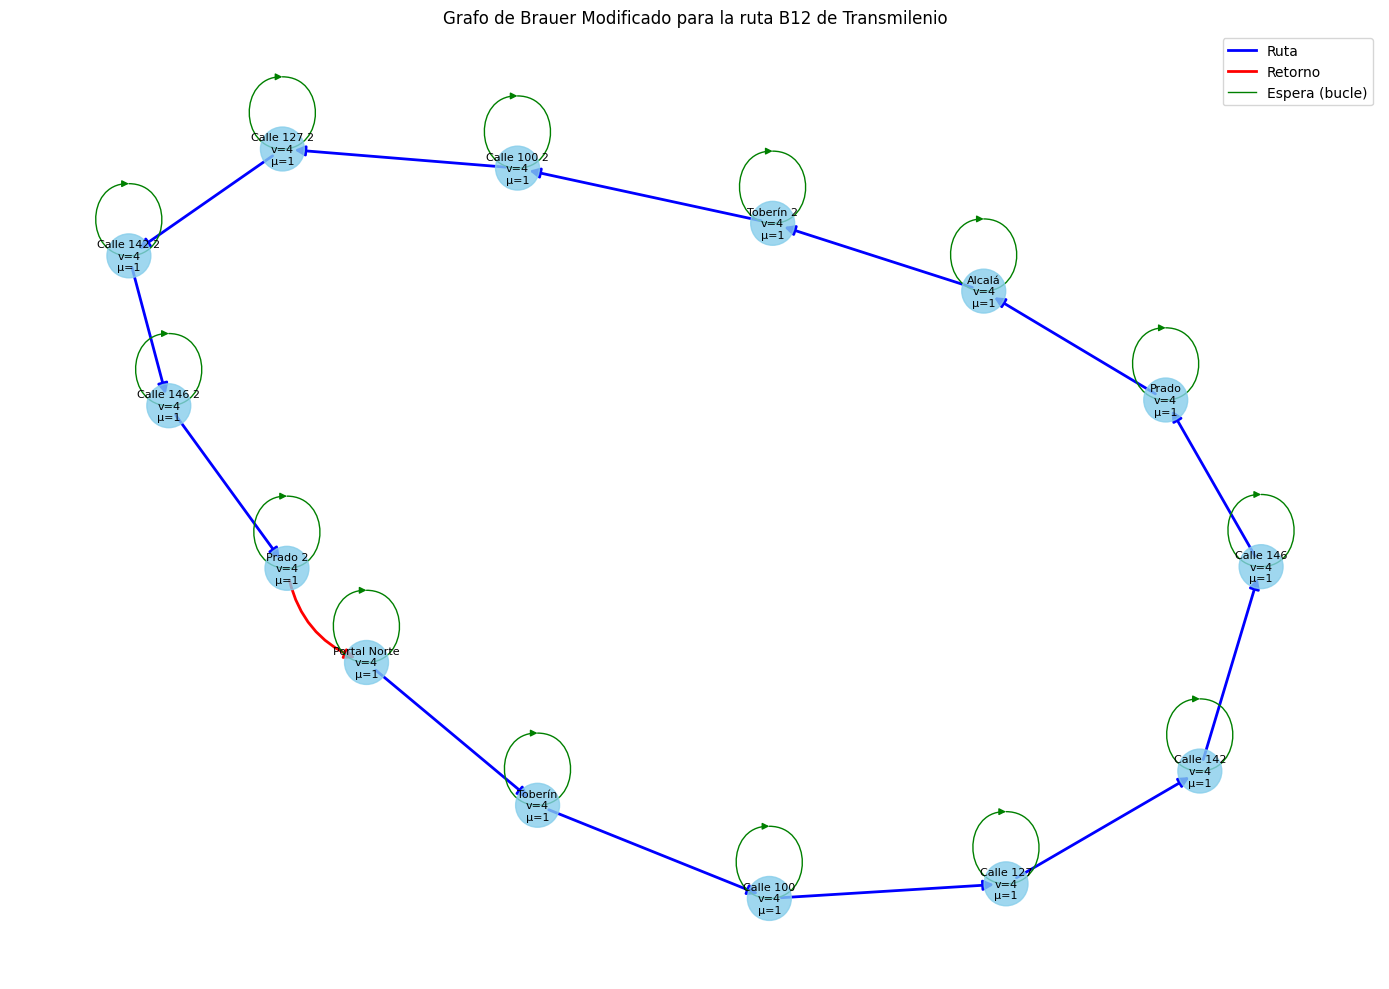


=== ANÁLISIS DE CICLOS ===
Número total de ciclos: 15
Ciclos de ruta: 1
Ciclos de espera: 14

Ciclos de ruta identificados:
  Ciclo 1: Calle 100 -> Calle 127 -> Calle 142 -> Calle 146 -> Prado -> Alcalá -> Toberín 2 -> Calle 100 2 -> Calle 127 2 -> Calle 142 2 -> Calle 146 2 -> Prado 2 -> Portal Norte -> Toberín -> Calle 100

=== ANÁLISIS DE MÉTRICAS DE LA RUTA (MODELO CÍCLICO) ===
Distancia total de la ruta: 11659.80 metros
Tiempo total de recorrido: 4085.20 segundos (68.09 minutos)
Tiempo total de espera en estaciones: 295.30 segundos (4.92 minutos)
Eficiencia de la ruta (entropía/dimensión): 0.016997

Distribución de bucles de espera por estación:
  Portal Norte: 1 bucles (tiempo de espera: 48.20s)
  Toberín: 1 bucles (tiempo de espera: 19.80s)
  Calle 100: 1 bucles (tiempo de espera: 17.60s)
  Calle 127: 1 bucles (tiempo de espera: 11.20s)
  Calle 142: 1 bucles (tiempo de espera: 19.70s)
  Calle 146: 1 bucles (tiempo de espera: 20.30s)
  Prado: 1 bucles (tiempo de espera: 12.90s)


<Figure size 1400x800 with 0 Axes>

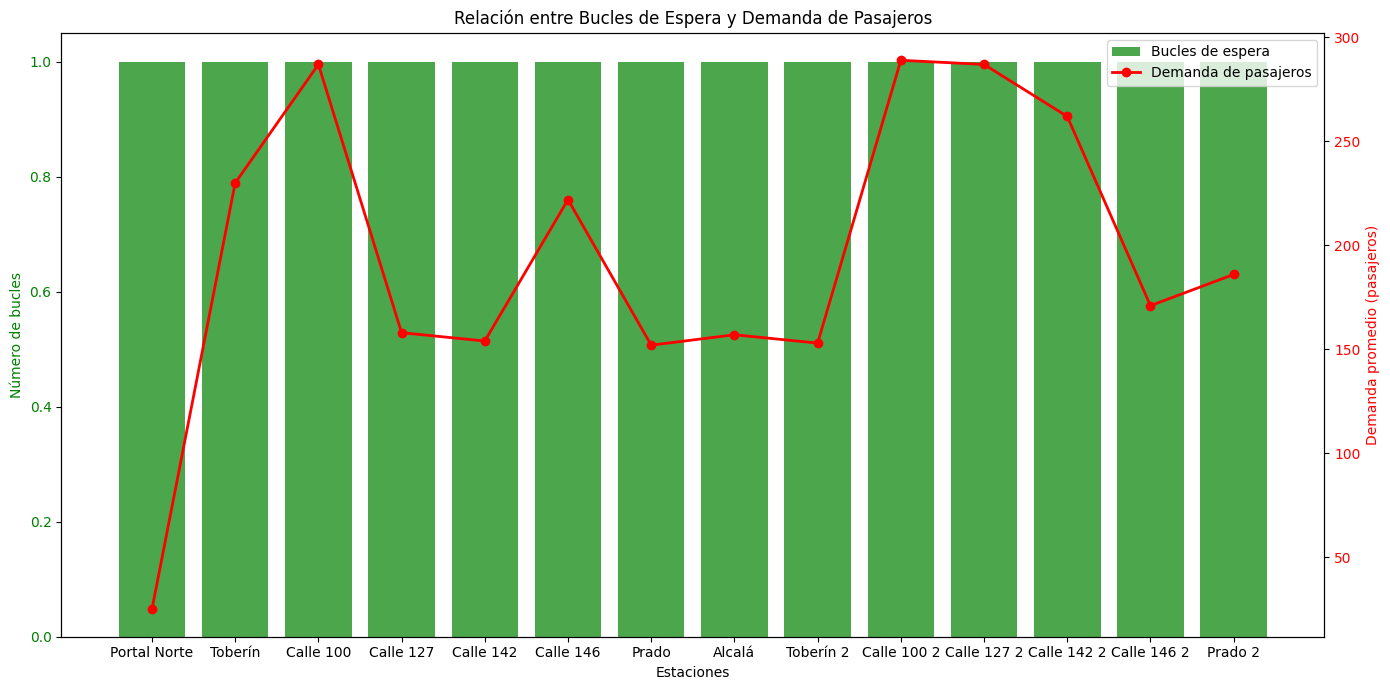


=== SUGERENCIAS DE OPTIMIZACIÓN (MODELO CÍCLICO) ===
Estaciones críticas (alto tiempo de espera y demanda):
  - Toberín: Bucles = 1, Tiempo de espera = 19.80s, Demanda = 230
  - Calle 100: Bucles = 1, Tiempo de espera = 17.60s, Demanda = 287
  - Calle 146: Bucles = 1, Tiempo de espera = 20.30s, Demanda = 222
  - Calle 100 2: Bucles = 1, Tiempo de espera = 21.20s, Demanda = 289
  - Calle 127 2: Bucles = 1, Tiempo de espera = 21.30s, Demanda = 287
  - Calle 142 2: Bucles = 1, Tiempo de espera = 20.70s, Demanda = 262

Sugerencias:
  - En la estación Toberín:
    * Reducir tiempo de espera para disminuir el número de bucles
    * Aumentar la capacidad de servicio debido a la alta demanda (230 pasajeros)
  - En la estación Calle 100:
    * Reducir tiempo de espera para disminuir el número de bucles
    * Aumentar la capacidad de servicio debido a la alta demanda (287 pasajeros)
  - En la estación Calle 146:
    * Reducir tiempo de espera para disminuir el número de bucles
    * Aumentar la

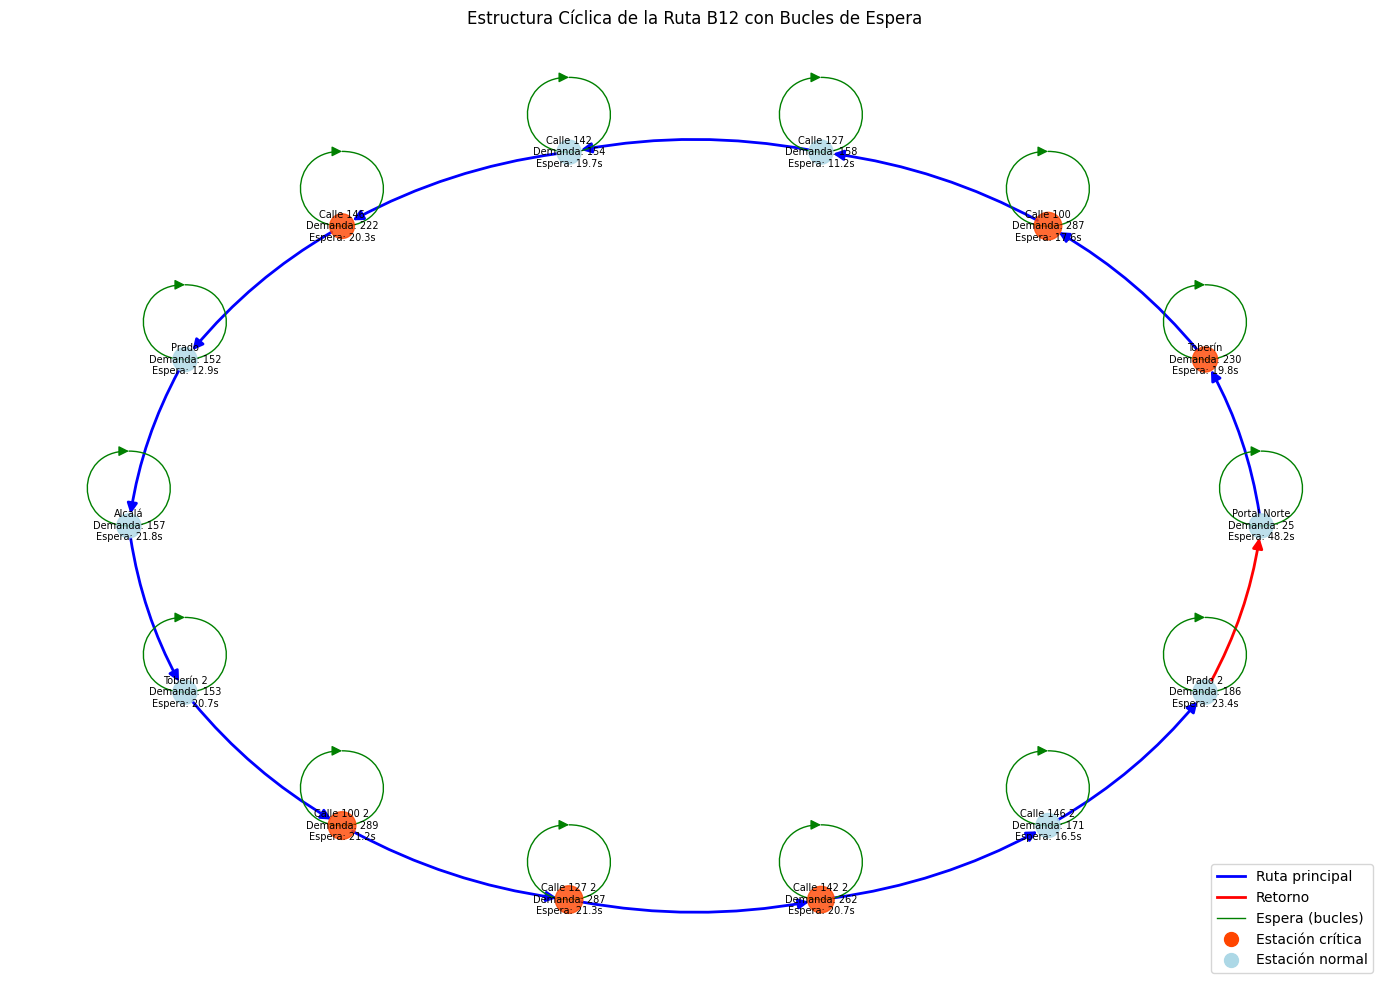

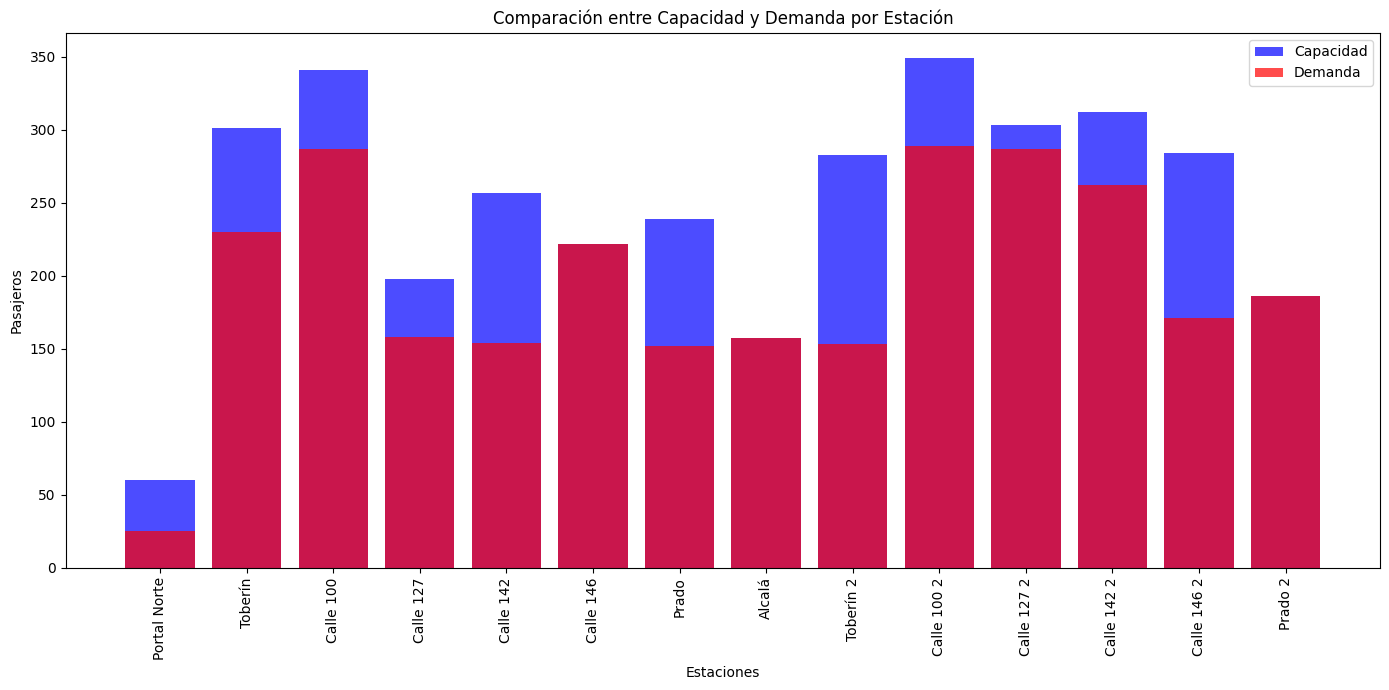

In [ ]:
class ModifiedBrauerAlgebra:
    def __init__(self, stations_data):

        # Inicializa un álgebra de Brauer modificada basada en los datos de estaciones

        self.stations_data = stations_data

        self.B0 = stations_data['nombre_estacion'].tolist()

        # Crear grafo dirigido
        self.graph = nx.MultiDiGraph()

        for station in self.B0:
            self.graph.add_node(station)

        for i in range(len(self.B0) - 1):
            source = self.B0[i]
            target = self.B0[i + 1]
            distance = stations_data.iloc[i+1]['distancia_anterior_m']
            time = stations_data.iloc[i+1]['tiempo_recorrido_prom_s']

            self.graph.add_edge(source, target, weight=distance, time=time, type='route')

        # Cierre del grafo
        last_to_first_distance = 4000
        last_to_first_time = 1200
        self.graph.add_edge(self.B0[-1], self.B0[0], weight=last_to_first_distance,
                           time=last_to_first_time, type='return')

        # Añadir bucles para tiempo de espera (1 bucle por minuto)
        for i, station in enumerate(self.B0):
            wait_time = stations_data.iloc[i]['tiempo_espera_prom_s']
            loops_count = max(1, int(round(wait_time / 60)))  # Convertir segundos a minutos y redondear

            for j in range(loops_count):
                # Cada bucle representa un minuto de espera
                self.graph.add_edge(station, station, weight=0, time=60, type='wait')

        # B1: representan polígonos con multiconjuntos de vértices B0
        # En este caso, las aristas del grafo (incluyendo bucles)
        # MultiDiGraph devuelve tuplas (u,v,key) así que necesitamos adaptarnos
        self.B1 = list(self.graph.edges(data=True))  # Ahora incluye data

        # Calcular valencias de los nodos
        self.valences = dict()
        for node in self.B0:
            in_degree = self.graph.in_degree(node)
            out_degree = self.graph.out_degree(node)
            self.valences[node] = in_degree + out_degree

        # Función μ según la definición dada
        self.mu = dict()
        for node in self.B0:
            if self.valences[node] != 1:
                self.mu[node] = 1
            else:
                self.mu[node] = 2

        # Orientación O (ya definida por el grafo dirigido)
        self.O = self.B1

        # Calcular invariantes algebraicos
        self.compute_invariants()

    def compute_invariants(self):

        # Dimensión del álgebra
        self.dimension_algebra = 0
        for node in self.B0:
            val = self.valences[node]
            mu_val = self.mu[node]
            self.dimension_algebra += val * (mu_val * val - 1)
        self.dimension_algebra += 2 * len(self.B1)

        # Calcular bucles
        loops = 0
        for u, v, data in self.B1:
            if u == v:
                loops += 1

        # Conjunto C_n
        C_n = [node for node in self.B0 if self.valences[node] == 1 and self.mu[node] != 1]

        # Dimensión del centro
        self.dimension_center = 1 + len(self.B1) - len(self.B0)
        for node in self.B0:
            self.dimension_center += self.valences[node]
        self.dimension_center += loops - len(C_n)

        # Entropía
        total_mu_val = sum(self.mu[node] * self.valences[node] for node in self.B0)
        if total_mu_val > 0:
            self.entropy = 0
            for node in self.B0:
                val = self.valences[node]
                p = val / total_mu_val
                if p > 0:  # Evitar log(0)
                    self.entropy -= p * math.log2(p)
        else:
            self.entropy = 0

    def visualize_graph(self):
        plt.figure(figsize=(14, 10))

        # Posiciones para el dibujo
        pos = nx.spring_layout(self.graph, seed=42)

        # Dibujar nodos
        node_sizes = [self.valences[node] * 250 for node in self.graph.nodes()]
        nx.draw_networkx_nodes(self.graph, pos, node_size=node_sizes,
                              node_color='skyblue', alpha=0.8)

        # Separar aristas por tipo
        route_edges = [(u, v) for u, v, d in self.graph.edges(data=True) if d['type'] == 'route']
        return_edges = [(u, v) for u, v, d in self.graph.edges(data=True) if d['type'] == 'return']
        wait_edges = [(u, v) for u, v, d in self.graph.edges(data=True) if d['type'] == 'wait']

        # Dibujar aristas de ruta
        nx.draw_networkx_edges(self.graph, pos, edgelist=route_edges,
                              edge_color='blue', arrows=True, arrowsize=15, width=2)

        # Dibujar arista de retorno
        nx.draw_networkx_edges(self.graph, pos, edgelist=return_edges,
                              edge_color='red', arrows=True, arrowsize=15, width=2,
                              connectionstyle='arc3,rad=0.3')

        # Dibujar bucles de espera
        for u, v in wait_edges:
            nx.draw_networkx_edges(self.graph, pos, edgelist=[(u, v)],
                                 edge_color='green', arrows=True, arrowsize=10,
                                 connectionstyle='arc3,rad=0.4', width=1)

        # Etiquetas de nodos con valencia y μ
        labels = {node: f"{node}\nv={self.valences[node]}\nμ={self.mu[node]}"
                 for node in self.graph.nodes()}
        nx.draw_networkx_labels(self.graph, pos, labels=labels, font_size=8)

        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], color='blue', lw=2, label='Ruta'),
            Line2D([0], [0], color='red', lw=2, label='Retorno'),
            Line2D([0], [0], color='green', lw=1, label='Espera (bucle)')
        ]
        plt.legend(handles=legend_elements, loc='upper right')

        plt.title("Grafo de Brauer Modificado para la ruta B12 de Transmilenio")
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('modified_brauer_graph_b12.png', dpi=300)
        plt.show()

    def print_info(self):
        """Imprime información sobre el álgebra de Brauer modificada"""
        print("=== ÁLGEBRA DE BRAUER MODIFICADA PARA LA RUTA B12 ===")

        # Contar tipos de aristas
        route_edges = [(u, v) for u, v, d in self.graph.edges(data=True) if d['type'] == 'route']
        return_edges = [(u, v) for u, v, d in self.graph.edges(data=True) if d['type'] == 'return']
        wait_edges = [(u, v) for u, v, d in self.graph.edges(data=True) if d['type'] == 'wait']

        print(f"Vértices (B0): {self.B0}")
        print(f"Total de aristas (B1): {len(self.B1)}")
        print(f"  - Aristas de ruta: {len(route_edges)}")
        print(f"  - Aristas de retorno: {len(return_edges)}")
        print(f"  - Bucles de espera: {len(wait_edges)}")

        print("\nValencias de los nodos:")
        for node, val in self.valences.items():
            print(f"  {node}: {val}")

        print("\nFunción μ:")
        for node, mu in self.mu.items():
            print(f"  μ({node}) = {mu}")

        print("\nInvariantes algebraicos:")
        print(f"  Dimensión del álgebra: {self.dimension_algebra}")
        print(f"  Dimensión del centro: {self.dimension_center}")
        print(f"  Entropía: {self.entropy:.4f}")

    def analyze_cycles(self):
        """Analiza los ciclos en el grafo modificado"""
        # Encontrar ciclos simples
        try:
            cycles = list(nx.simple_cycles(self.graph))

            print("\n=== ANÁLISIS DE CICLOS ===")
            print(f"Número total de ciclos: {len(cycles)}")

            # Categorizar ciclos
            route_cycles = []
            wait_cycles = []

            for cycle in cycles:
                is_wait_cycle = True

                # Comprobar si es un ciclo de espera (solo contiene un nodo)
                if len(set(cycle)) == 1:
                    wait_cycles.append(cycle)
                else:
                    route_cycles.append(cycle)

            print(f"Ciclos de ruta: {len(route_cycles)}")
            print(f"Ciclos de espera: {len(wait_cycles)}")

            # Mostrar ciclos de ruta
            if route_cycles:
                print("\nCiclos de ruta identificados:")
                for i, cycle in enumerate(route_cycles):
                    if len(cycle) > 1:  # Solo mostrar ciclos con más de un nodo
                        cycle_str = " -> ".join(cycle)
                        print(f"  Ciclo {i+1}: {cycle_str} -> {cycle[0]}")

                # Limitar a mostrar solo los primeros 10 ciclos si hay muchos
                if len(route_cycles) > 10:
                    print(f"  ... y {len(route_cycles) - 10} más.")

        except Exception as e:
            print(f"Error al analizar ciclos: {e}")

def analyze_route_metrics(brauer_algebra):

    stations_data = brauer_algebra.stations_data
    G = brauer_algebra.graph

    # Análisis de tiempos y distancias
    total_distance = stations_data['distancia_anterior_m'].sum()
    total_time = stations_data['tiempo_recorrido_prom_s'].sum()

    # Tiempo total de espera
    total_wait_time = stations_data['tiempo_espera_prom_s'].sum()

    # Conteo de bucles por estación
    station_loops = {}
    for node in brauer_algebra.B0:
        loops = [(u, v) for u, v, d in G.edges(data=True) if u == v and v == node]
        station_loops[node] = len(loops)

    # Calcular eficiencia basada en el álgebra de Brauer
    if brauer_algebra.dimension_algebra > 0:
        efficiency = brauer_algebra.entropy / brauer_algebra.dimension_algebra
    else:
        efficiency = 0

    print("\n=== ANÁLISIS DE MÉTRICAS DE LA RUTA (MODELO CÍCLICO) ===")
    print(f"Distancia total de la ruta: {total_distance:.2f} metros")
    print(f"Tiempo total de recorrido: {total_time:.2f} segundos ({total_time/60:.2f} minutos)")
    print(f"Tiempo total de espera en estaciones: {total_wait_time:.2f} segundos ({total_wait_time/60:.2f} minutos)")
    print(f"Eficiencia de la ruta (entropía/dimensión): {efficiency:.6f}")

    print("\nDistribución de bucles de espera por estación:")
    for station, loops in station_loops.items():
        wait_time = stations_data[stations_data['nombre_estacion'] == station]['tiempo_espera_prom_s'].values[0]
        print(f"  {station}: {loops} bucles (tiempo de espera: {wait_time:.2f}s)")

    # Visualizar relación entre bucles (tiempo de espera) y demanda de pasajeros
    plt.figure(figsize=(14, 8))
    stations = list(station_loops.keys())
    loops_count = [station_loops[s] for s in stations]
    wait_times = [stations_data[stations_data['nombre_estacion'] == s]['tiempo_espera_prom_s'].values[0] for s in stations]
    demands = [stations_data[stations_data['nombre_estacion'] == s]['demanda_promedio'].values[0] for s in stations]

    x = range(len(stations))

    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Gráfico de barras para bucles
    bars = ax1.bar(x, loops_count, alpha=0.7, color='green', label='Bucles de espera')
    ax1.set_xlabel('Estaciones')
    ax1.set_ylabel('Número de bucles', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Línea para demanda de pasajeros
    ax2 = ax1.twinx()
    line = ax2.plot(x, demands, 'r-', marker='o', linewidth=2, label='Demanda de pasajeros')
    ax2.set_ylabel('Demanda promedio (pasajeros)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Etiquetas en el eje x
    plt.xticks(x, stations, rotation=90, ha='center')

    # Combinar leyendas
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.title('Relación entre Bucles de Espera y Demanda de Pasajeros')
    plt.tight_layout()
    plt.savefig('loops_demand_relation.png', dpi=300)
    plt.show()

    return efficiency

def suggest_optimizations(brauer_algebra):

    stations_data = brauer_algebra.stations_data
    G = brauer_algebra.graph

    # Identificar estaciones con alto número de bucles y alta demanda
    critical_stations = []
    for station in brauer_algebra.B0:
        loops = [(u, v) for u, v, d in G.edges(data=True) if u == v and v == station]
        loops_count = len(loops)

        station_data = stations_data[stations_data['nombre_estacion'] == station]
        if not station_data.empty:
            wait_time = station_data['tiempo_espera_prom_s'].values[0]
            demand = station_data['demanda_promedio'].values[0]

            # Si tiene muchos bucles y alta demanda
            if loops_count > 0 and demand > stations_data['demanda_promedio'].mean():
                critical_stations.append((station, loops_count, wait_time, demand))

    print("\n=== SUGERENCIAS DE OPTIMIZACIÓN (MODELO CÍCLICO) ===")

    if len(critical_stations) > 0:
        print("Estaciones críticas (alto tiempo de espera y demanda):")
        for station, loops_count, wait_time, demand in critical_stations:
            print(f"  - {station}: Bucles = {loops_count}, Tiempo de espera = {wait_time:.2f}s, Demanda = {demand}")

        print("\nSugerencias:")
        for station, loops_count, wait_time, demand in critical_stations:
            print(f"  - En la estación {station}:")
            print(f"    * Reducir tiempo de espera para disminuir el número de bucles")
            if demand > 200:  # Umbral ajustado para alta demanda
                print(f"    * Aumentar la capacidad de servicio debido a la alta demanda ({demand} pasajeros)")
    else:
        print("No se identificaron estaciones críticas.")

    # Calcular posibles reducciones de tiempo basadas en el modelo cíclico
    cycle_optimization = {}

    # Principal ciclo de la ruta (incluyendo retorno)
    main_cycle = brauer_algebra.B0 + [brauer_algebra.B0[0]]
    cycle_time = 0
    cycle_distance = 0

    # Calcular tiempo y distancia del ciclo principal
    for i in range(len(main_cycle) - 1):
        source = main_cycle[i]
        target = main_cycle[i+1]

        # Buscar la arista correcta
        for u, v, data in G.edges(data=True):
            if u == source and v == target and data['type'] != 'wait':
                cycle_time += data['time']
                cycle_distance += data['weight']
                break

    # Añadir tiempo de espera en estaciones
    for station in brauer_algebra.B0:
        station_data = stations_data[stations_data['nombre_estacion'] == station]
        if not station_data.empty:
            cycle_time += station_data['tiempo_espera_prom_s'].values[0]

    print(f"\nTiempo total del ciclo completo: {cycle_time:.2f}s ({cycle_time/60:.2f}min)")
    print(f"Distancia total del ciclo: {cycle_distance:.2f}m")

    # Identificar posibles reducciones
    print("\nPosibles optimizaciones del ciclo:")
    print("  1. Reducir tiempos de espera en estaciones críticas")
    print("  2. Optimizar ruta de retorno (última a primera estación)")

    # Estimar posible ahorro
    wait_time_savings = sum([wait_time * 0.2 for _, _, wait_time, _ in critical_stations])
    print(f"\nPosible ahorro de tiempo con optimizaciones: {wait_time_savings:.2f}s ({wait_time_savings/60:.2f}min)")

    # Visualizar estructura cíclica y bucles con todos los nodos
    plt.figure(figsize=(14, 10))

    # Usar layout circular para enfatizar la estructura cíclica
    pos = nx.circular_layout(G)

    # Escalado de nodos según demanda
    node_sizes = []
    node_colors = []
    for node in G.nodes():
        station_data = stations_data[stations_data['nombre_estacion'] == node]
        demand = station_data['demanda_promedio'].values[0]
        # Tamaño basado en demanda (normalizado)
        node_sizes.append(max(300, 50 + demand * 1.2))

        # Color basado en si es estación crítica
        is_critical = any(station == node for station, _, _, _ in critical_stations)
        node_colors.append('orangered' if is_critical else 'lightblue')

    # Colores por tipo de arista
    edge_colors = []
    edge_widths = []

    for u, v, data in G.edges(data=True):
        if data['type'] == 'route':
            edge_colors.append('blue')
            edge_widths.append(2)
        elif data['type'] == 'return':
            edge_colors.append('red')
            edge_widths.append(2)
        else:  # wait
            edge_colors.append('green')
            edge_widths.append(1)

    # Dibujar nodos y aristas
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)

    # Dibujar aristas con colores específicos
    edges = list(G.edges())
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors, width=edge_widths,
                          connectionstyle='arc3,rad=0.1', arrowsize=15)

    # Etiquetas personalizadas
    labels = {}
    for node in G.nodes():
        station_data = stations_data[stations_data['nombre_estacion'] == node]
        demand = station_data['demanda_promedio'].values[0]
        wait = station_data['tiempo_espera_prom_s'].values[0]
        labels[node] = f"{node}\nDemanda: {demand}\nEspera: {wait:.1f}s"

    nx.draw_networkx_labels(G, pos, labels=labels, font_size=7)

    # Leyenda
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='blue', lw=2, label='Ruta principal'),
        Line2D([0], [0], color='red', lw=2, label='Retorno'),
        Line2D([0], [0], color='green', lw=1, label='Espera (bucles)'),
        Line2D([0], [0], marker='o', color='orangered', label='Estación crítica', markersize=10, linestyle='None'),
        Line2D([0], [0], marker='o', color='lightblue', label='Estación normal', markersize=10, linestyle='None')
    ]
    plt.legend(handles=legend_elements, loc='lower right')

    plt.title("Estructura Cíclica de la Ruta B12 con Bucles de Espera")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('cyclic_route_structure.png', dpi=300)
    plt.show()

    # Comparación de demanda vs capacidad
    plt.figure(figsize=(14, 7))
    stations = stations_data['nombre_estacion'].tolist()
    capacities = stations_data['capacidad_pasajeros'].tolist()
    demands = stations_data['demanda_promedio'].tolist()

    x = range(len(stations))

    plt.bar(x, capacities, alpha=0.7, color='blue', label='Capacidad')
    plt.bar(x, demands, alpha=0.7, color='red', label='Demanda')

    plt.xlabel('Estaciones')
    plt.ylabel('Pasajeros')
    plt.xticks(x, stations, rotation=90, ha='center')
    plt.title('Comparación entre Capacidad y Demanda por Estación')
    plt.legend()
    plt.tight_layout()
    plt.savefig('capacity_demand_comparison.png', dpi=300)
    plt.show()

# Crear instancia del álgebra de Brauer modificada
modified_brauer = ModifiedBrauerAlgebra(df_b12)

# Imprimir información
modified_brauer.print_info()

# Visualizar el grafo modificado
modified_brauer.visualize_graph()

# Analizar ciclos
modified_brauer.analyze_cycles()

# Analizar métricas
route_efficiency = analyze_route_metrics(modified_brauer)

# Sugerir optimizaciones
suggest_optimizations(modified_brauer)